In [1]:
# 따라하기용 코드
import warnings

warnings.filterwarnings("ignore") # 경고 무시

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

In [2]:
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
train.describe(include="O")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [8]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
# Data preprocessing
train['tempDate'] = train['datetime'].apply(lambda x:x.split()) # 현재 datetime에 있는 양식을 스페이스 단위로 쪼갠 list를 tempDate에 넣기
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]"


In [10]:
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], '%Y-%m-%d').weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,01,01,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,01,01,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,01,01,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,01,01,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,01,01,Saturday,04


In [12]:
train['year'] = pd.to_numeric(train.year, errors='coerce')
train['month'] = pd.to_numeric(train.month, errors='coerce')
train['day'] = pd.to_numeric(train.day, errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,Saturday,4


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [15]:
train.drop('tempDate', axis=1, inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


<AxesSubplot:xlabel='hour', ylabel='count'>

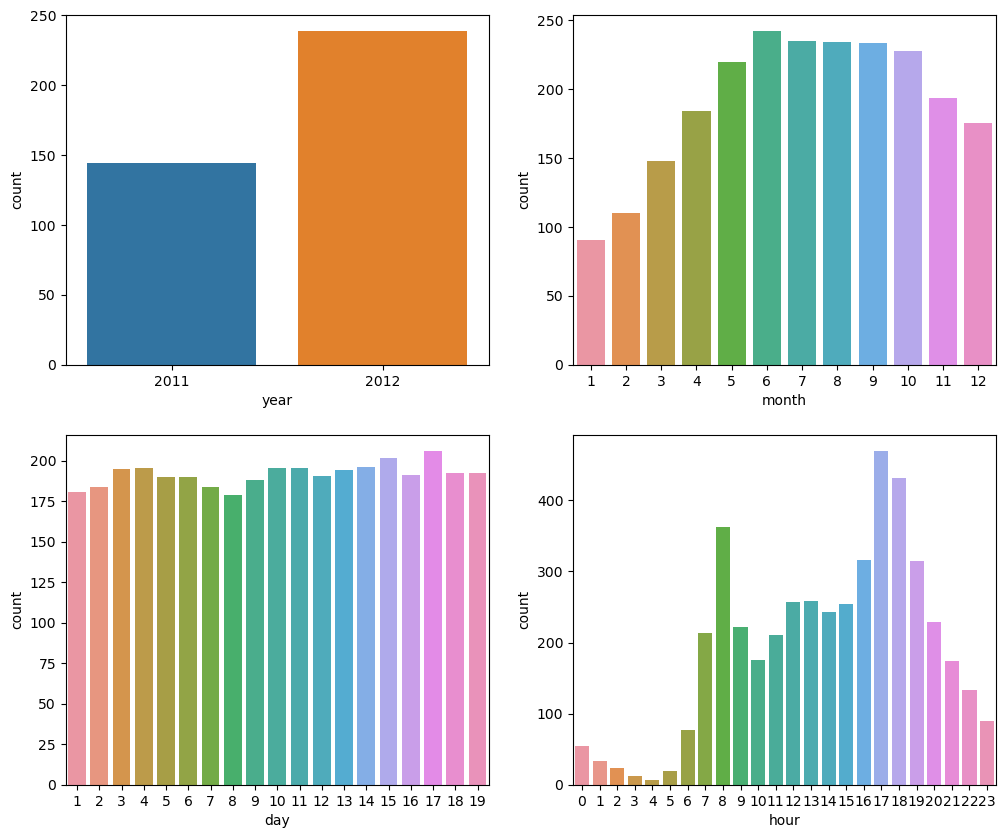

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 연도별/월별/일별/시간대별 count의 평균 계산
sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index(), ax=axes[0][0])
sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index(), ax=axes[0][1])
sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index(), ax=axes[1][0])
sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index(), ax=axes[1][1])

- 2011년보다 2012년도의 대여 횟수가 더 많다.
- 월별로는 날씨가 풀리는 4~5월 이후부터 10월까지의 대여 횟수가 높음
- 날짜별로는 큰 차이가 없다.
- 출퇴근시간대인 8시와 17-18시의 대여 횟수가 높음

<AxesSubplot:xlabel='weather', ylabel='count'>

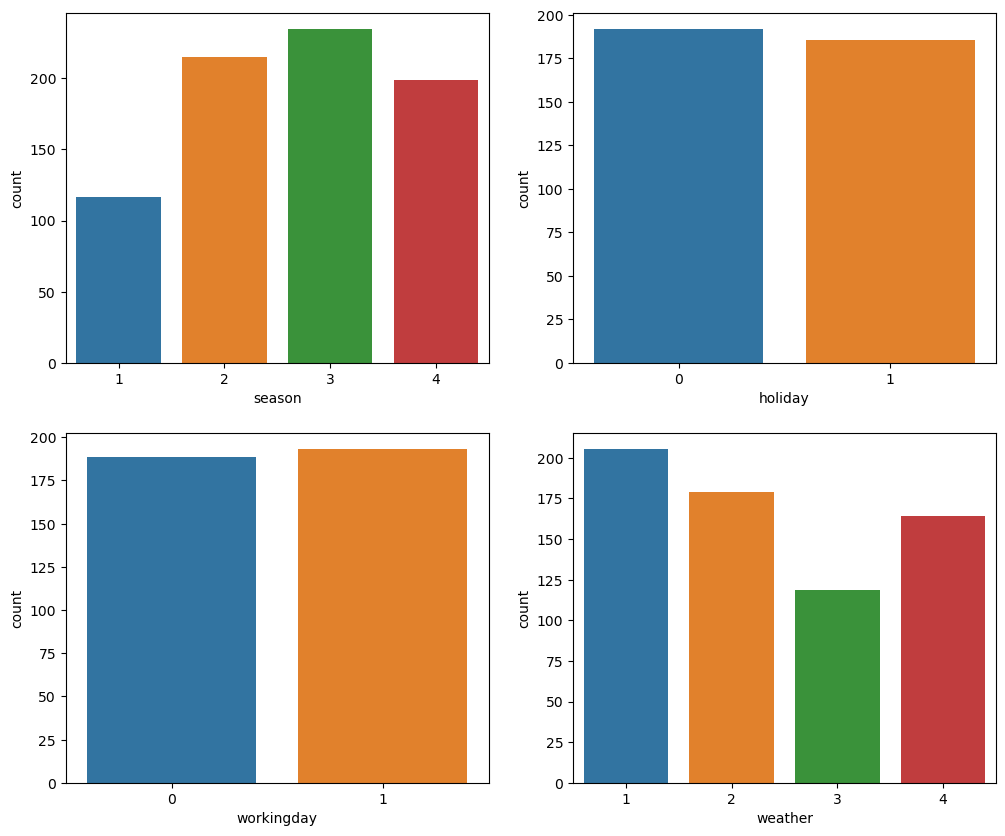

In [19]:
# 계절별 / 휴무여부별 / 평일여부별 / 계절별
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index(), ax=axes[0][0])
sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index(), ax=axes[0][1])
sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index(), ax=axes[1][0])
sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index(), ax=axes[1][1])

- 1월~3월보다 4월~6월, 7월~10월일때의 대여 횟수가 높은 편
- 맑을때와 흐릴때의 대여 횟수가 높음

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

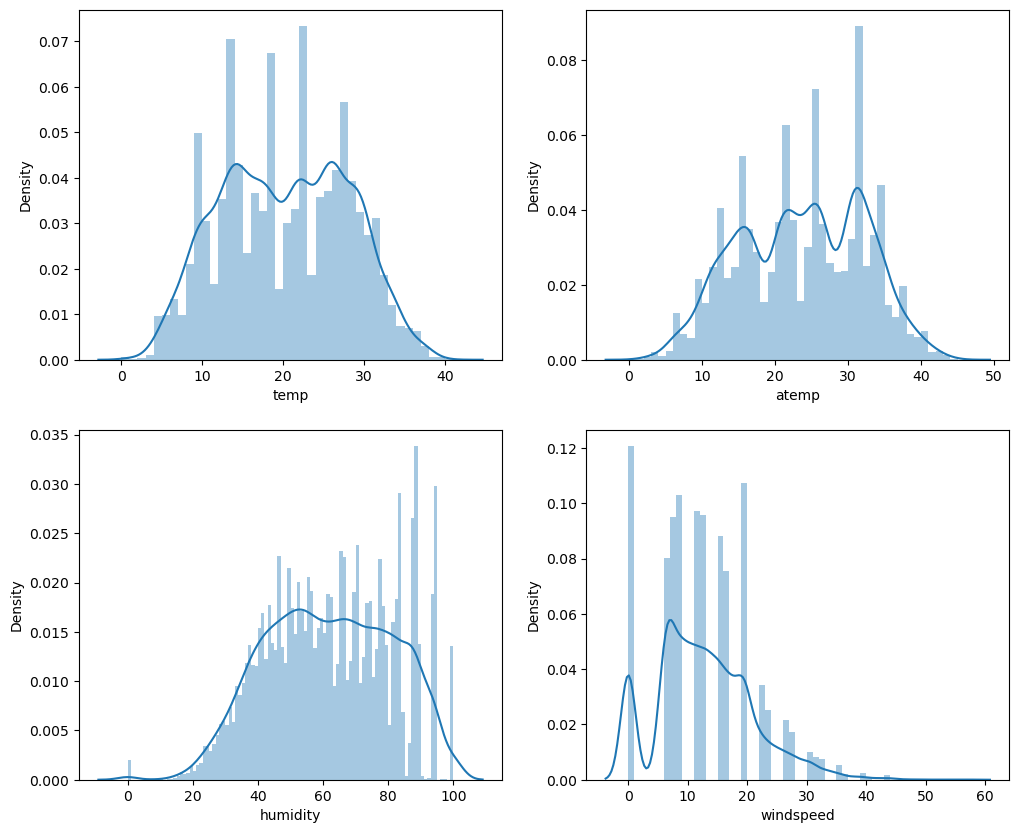

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# 연속형 변수들의 데이터 분포 확인
# temp(기온), atemp(체감온도), humidity, windspeed
sns.distplot(train.temp, bins=range(int(train.temp.min()), int(train.temp.max()) + 1), ax=axes[0][0])
sns.distplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max()) + 1), ax=axes[0][1])
sns.distplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max()) + 1), ax=axes[1][0])
sns.distplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max()) + 1), ax=axes[1][1])

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

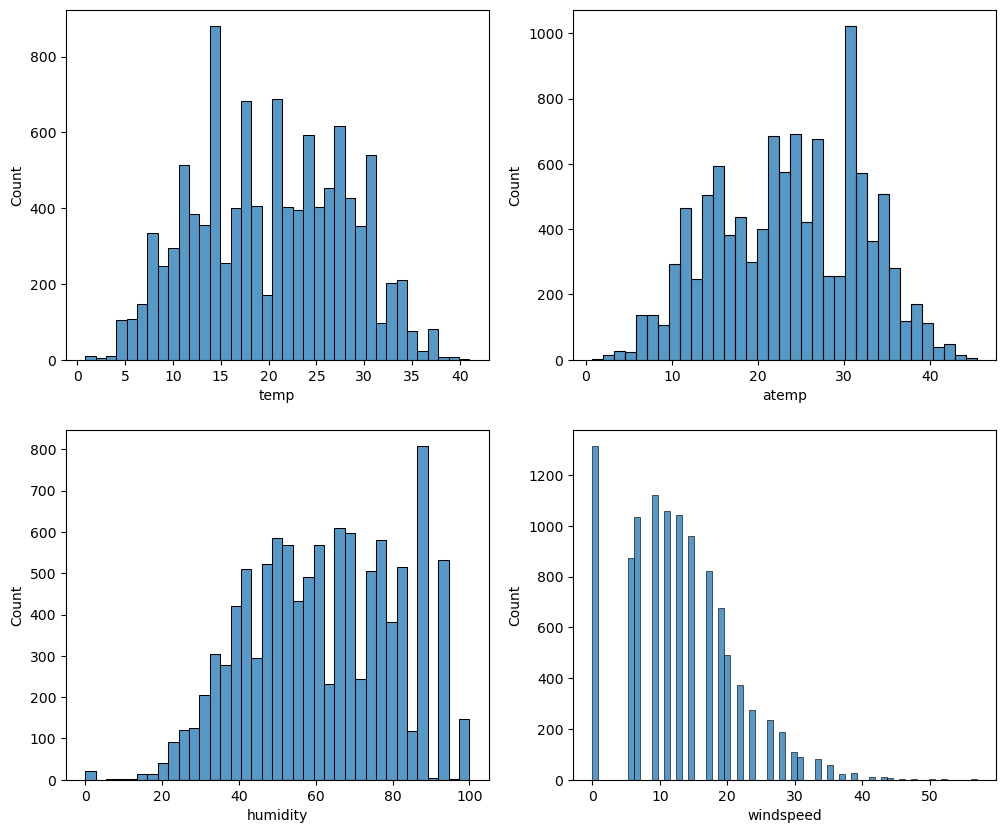

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# 연속형 변수들의 데이터 분포 확인
# temp(기온), atemp(체감온도), humidity, windspeed
sns.histplot(train.temp, ax=axes[0][0])
sns.histplot(train.atemp, ax=axes[0][1])
sns.histplot(train.humidity, ax=axes[1][0])
sns.histplot(train.windspeed, ax=axes[1][1])

- 다른 분포들이 종모양을 띠는 반면, 풍속의 분포 상태가 이상함

In [21]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


<AxesSubplot:>

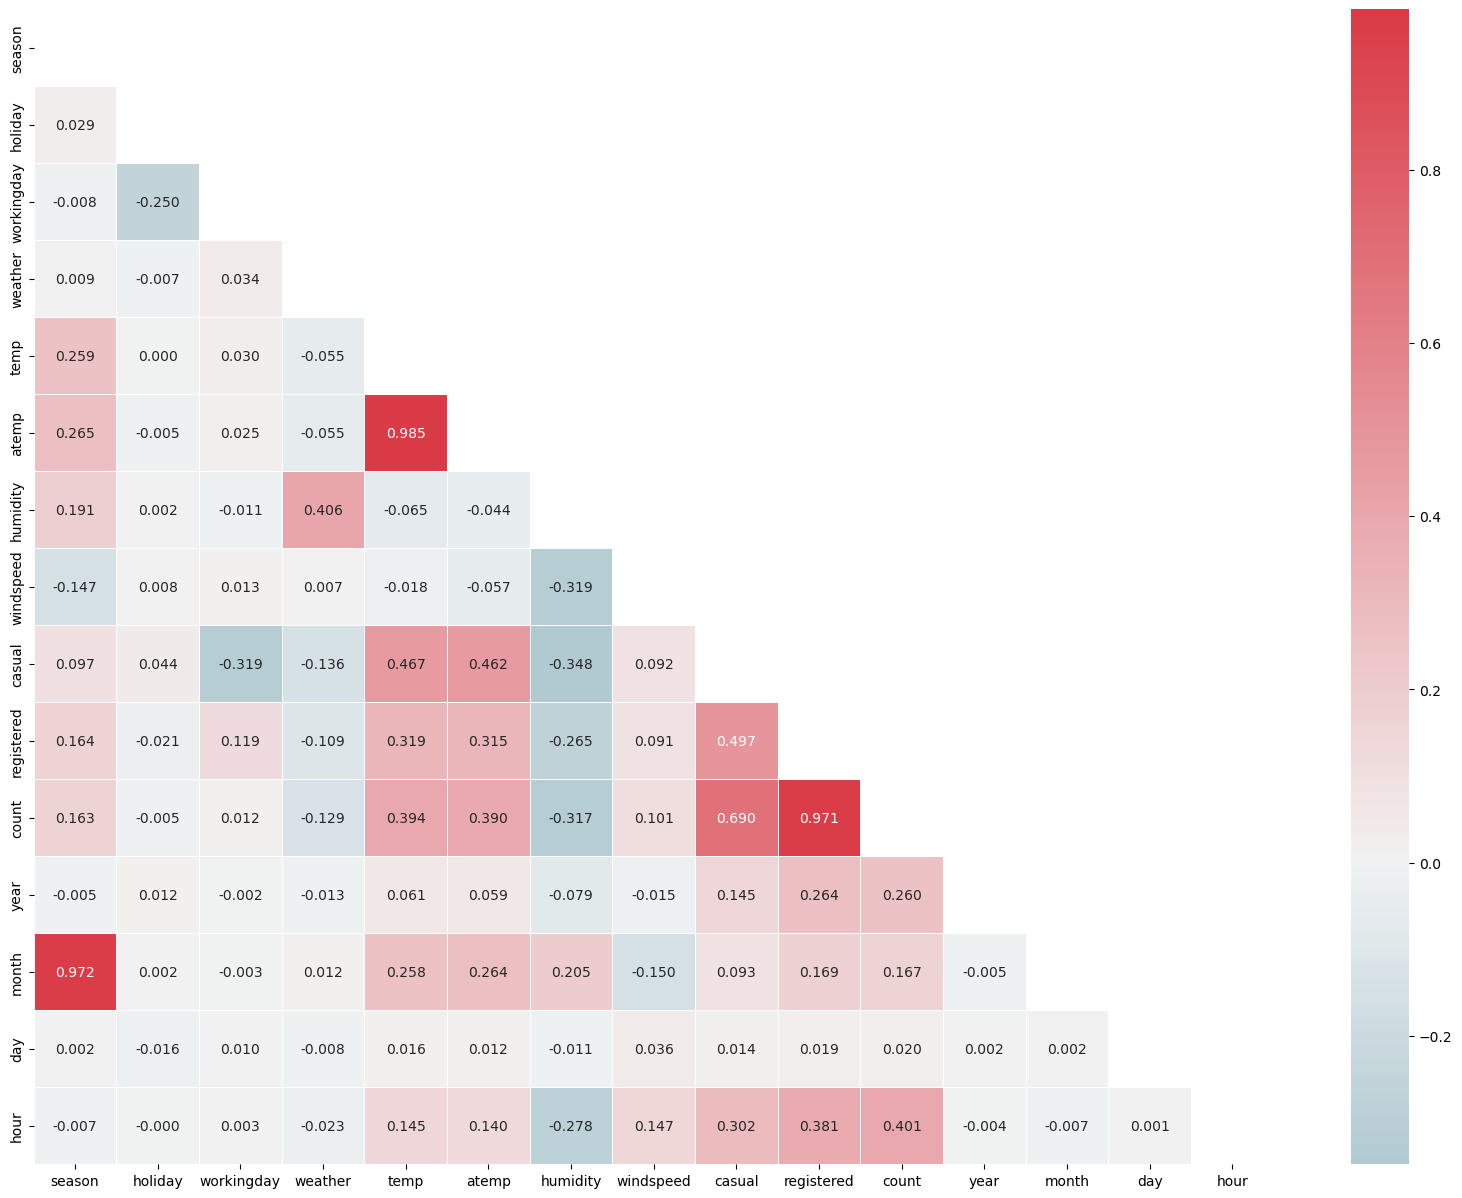

In [22]:
corr = train.corr() # 변수별 상관관계 저장

mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidth=.5, annot=True, fmt='.3f')

In [23]:
corr_order = train.corr().loc[:, 'count'].abs().sort_values(ascending=False)
corr_order

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='count'>

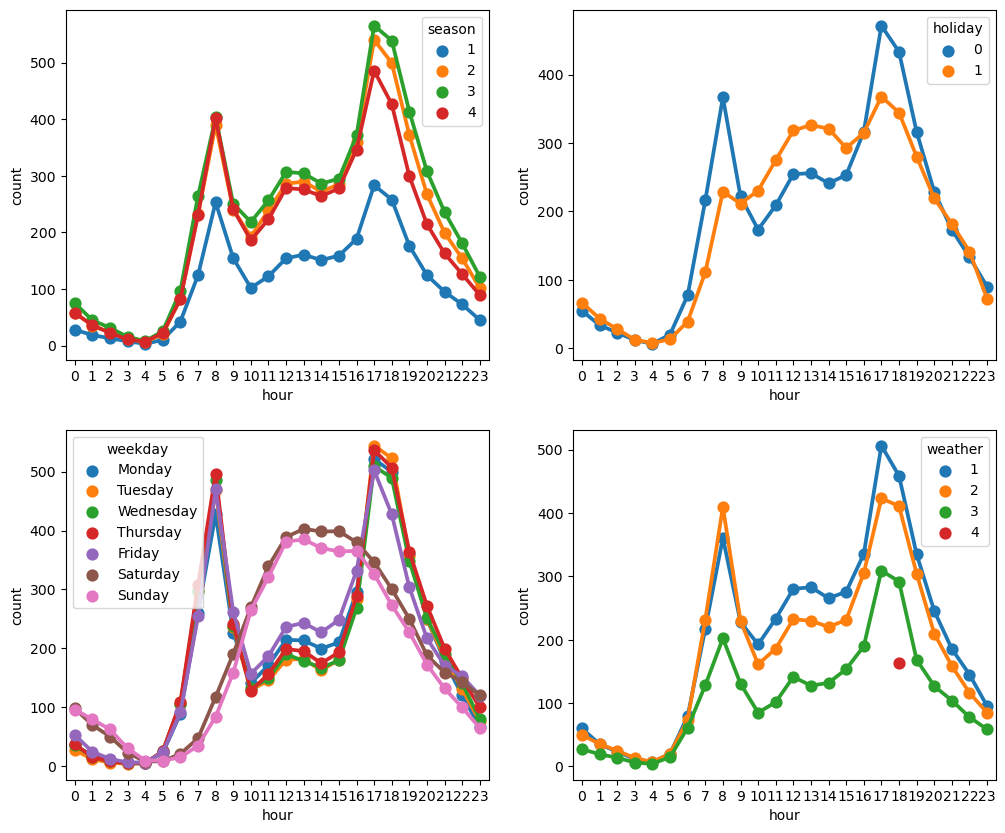

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.pointplot(x='hour', y='count', hue='season', data=train.groupby(['season', 'hour'])['count'].mean().reset_index(), ax=axes[0][0])
sns.pointplot(x='hour', y='count', hue='holiday', data=train.groupby(['holiday', 'hour'])['count'].mean().reset_index(), ax=axes[0][1])
sns.pointplot(x='hour', y='count', hue='weekday', hue_order=calendar.day_name[:], data=train.groupby(['weekday', 'hour'])['count'].mean().reset_index(), ax=axes[1][0])
sns.pointplot(x='hour', y='count', hue='weather', data=train.groupby(['weather', 'hour'])['count'].mean().reset_index(), ax=axes[1][1])

대부분 유사한 양상을 띠나,
- 휴일이 아닐 경우 출퇴근 시간대에, 휴일인 경우 낮시간대의 대여 횟수가 높음
- 주말인 경우 낮시간대의 대여 횟수, 평일의 경우 출퇴근 시간대에 대여 횟수가 높은 양상
- 날씨가 4일때 이상치 존재

In [28]:
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


<AxesSubplot:xlabel='month', ylabel='count'>

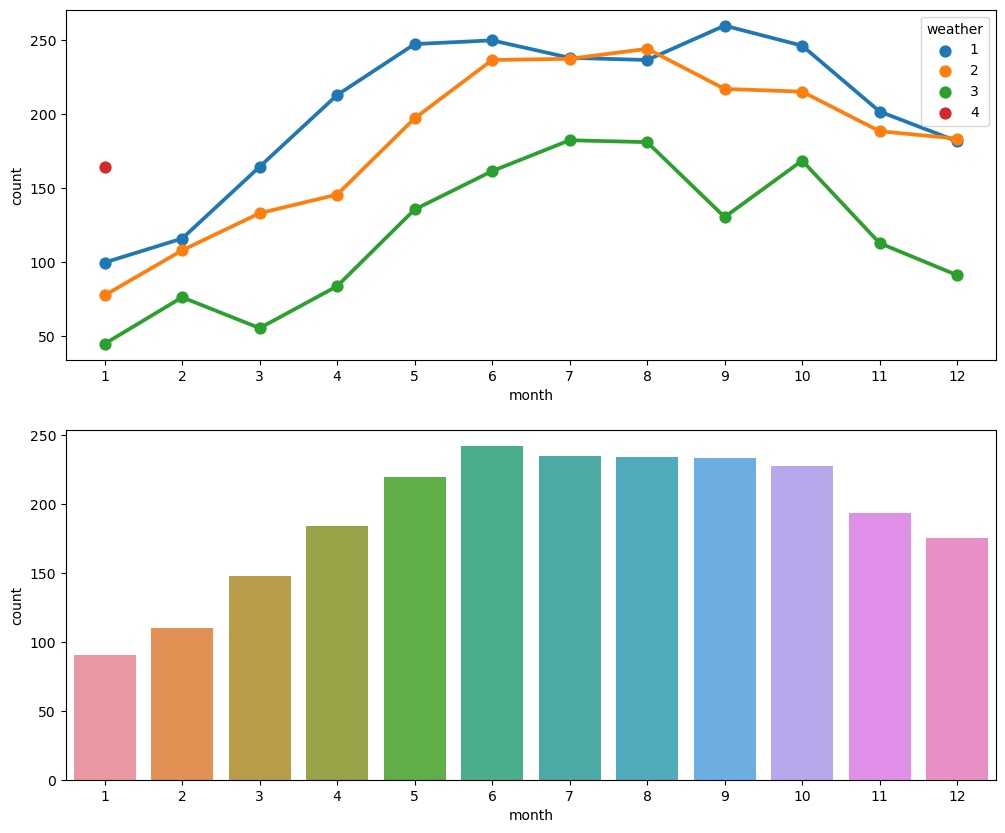

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.pointplot(x='month', y='count', hue='weather', data=train.groupby(['weather', 'month'])['count'].mean().reset_index(), ax=axes[0])
sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index(), ax=axes[1])

In [30]:
train['weekday'] = train.weekday.astype('category') # category화

In [33]:
train.weekday.cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [34]:
weekday_mapping = { 'Monday': 0,
					'Tuesday': 1, 
					'Wednesday': 2, 
					'Thursday': 3, 
					'Friday': 4, 
					'Saturday': 5, 
					'Sunday': 6 
				   }

# train['weekday']를 숫자로 매핑
train['weekday'] = train['weekday'].map(weekday_mapping)

In [35]:
len(train[train['windspeed']==0])

1313

<AxesSubplot:xlabel='count'>

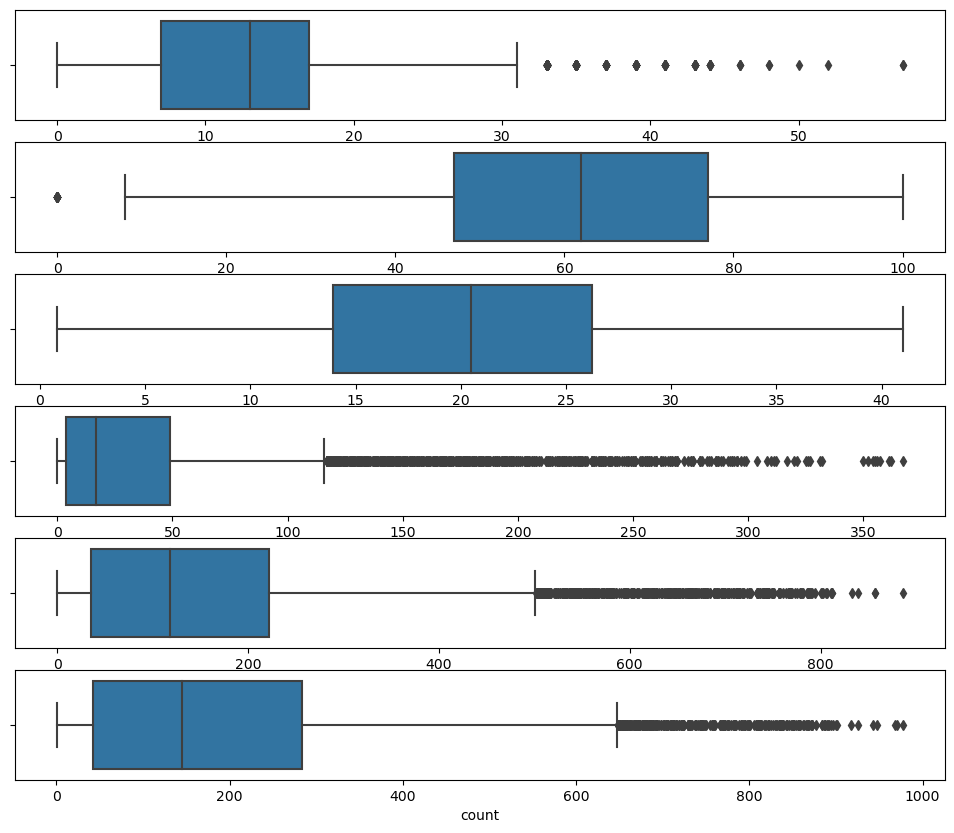

In [36]:
fig, axes = plt.subplots(6, 1, figsize=(12, 10))

sns.boxplot(x='windspeed', data=train, ax=axes[0])
sns.boxplot(x='humidity', data=train, ax=axes[1])
sns.boxplot(x='temp', data=train, ax=axes[2])
sns.boxplot(x='casual', data=train, ax=axes[3])
sns.boxplot(x='registered', data=train, ax=axes[4])
sns.boxplot(x='count', data=train, ax=axes[5])

In [38]:
from sklearn.ensemble import RandomForestRegressor

# 풍속 0
windspeed_0 = train[train.windspeed==0]
# 그 외
windspeed_n0 = train[train.windspeed!=0]

# 풍속과 관계 없는 요소 제거
windspeed_0_df = windspeed_0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis=1)
# train
windspeed_n0_df = windspeed_n0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis=1)
windspeed_n0_series = windspeed_n0['windspeed']

rf = RandomForestRegressor()
rf.fit(windspeed_n0_df, windspeed_n0_series)

predicted_windspeed = rf.predict(windspeed_0_df)

windspeed_0['windspeed'] = predicted_windspeed

In [39]:
train = pd.concat([windspeed_0, windspeed_n0], axis=0)
train.datetime = pd.to_datetime(train.datetime, errors='coerce')

In [40]:
train = train.sort_values(by=['datetime'])
# 어느 순서로 정렬되어있던 데이터인지 잘 기억할것..

Min value of windspeed is 6.0032


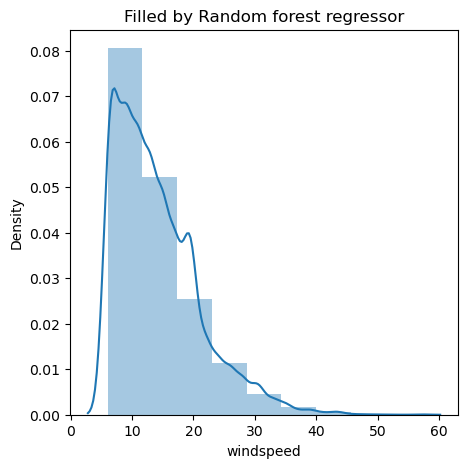

In [41]:
fig = plt.figure(figsize=(5, 5))
sns.distplot(train['windspeed'], bins=np.linspace(train['windspeed'].min(), train['windspeed'].max(), 10))
plt.title("Filled by Random forest regressor")

print("Min value of windspeed is {}".format(train['windspeed'].min()))

한번 가공을 거친 데이터는...
<br>train과 test에 모두 동일하게 작업을 거쳐줘야된다

In [43]:
# 학습 데이터 만들기
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

combine = pd.concat([train, test], axis=0)

In [44]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [45]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x:x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x:x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x:x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x:x[1].split(':')[0])

date = {'year', 'month', 'day', 'hour'}

for d in date:
    combine[d] = pd.to_numeric(combine[d], errors='coerce')

In [46]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [47]:
combine['weekday'] = combine['weekday'].astype('category')
weekday_mapping = { 'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6 }

combine['weekday'] = combine['weekday'].map(weekday_mapping)

dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [48]:
dataWind0df = dataWind0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 'tempDate'], axis=1)
dataWindNot0df = dataWindNot0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 'tempDate'], axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0df, dataWindNot0_series)
predicted = rf2.predict(dataWind0df)
print(predicted)

[ 7.142334  6.862408  6.902474 ...  8.752009 26.340313 11.940606]


In [49]:
dataWind0['windspeed'] = predicted

combine = pd.concat([dataWind0, dataWindNot0], axis=0)

In [61]:
# 학습에 포함시킬 col / 아닌 col 분리
categorizational_columns = ['holiday', 'humidity', 'season', 'weather', 'workingday', 'month', 'day', 'hour']
drop_columns = ['datetime', 'casual', 'registered', 'count', 'tempDate']

for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [62]:
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

datetimecol = test['datetime']
Y_train = train['count']
Y_registered = train['registered']
Y_casual = train['casual']

In [63]:
# 필요없는 열 제거
train = train.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis=1)

In [64]:
# RMSLE 방식을 통한 예측 평가

# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [65]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

lr = LinearRegression()

Y_train_log = np.log1p(Y_train)
lr.fit(train, Y_train_log)
pred = lr.predict(train)

rmsle(np.exp(Y_train_log), np.exp(pred), False)

0.9773499992763868

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge = Ridge()

ridge_params = { 'max_iter': [3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge = GridSearchCV(ridge, ridge_params, scoring=rmsle_scorer, cv=5)

grid_ridge.fit(train, Y_train_log)
pred = grid_ridge.predict(train)
print(grid_ridge.best_params_)

print(f'best score: {rmsle(np.exp(Y_train_log), np.exp(pred), False)}')

{'alpha': 0.001, 'max_iter': 3000}
best score: 0.9773499990502146


In [67]:
lasso = Lasso()

lasso_params = { 'max_iter': [3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(lasso, lasso_params, scoring=rmsle_scorer, cv=5)

grid_lasso.fit(train, Y_train_log)
pred = grid_lasso.predict(train)
print(grid_lasso.best_params_)

print(f'best score: {rmsle(np.exp(Y_train_log), np.exp(pred), False)}')

{'alpha': 0.001, 'max_iter': 3000}
best score: 0.9773713787269042


In [68]:
rf = RandomForestRegressor()

rf_params = { 'n_estimators': [10, 100, 200], 'max_depth' : range(2, 10, 2) }
grid_rf = GridSearchCV(rf, rf_params, scoring=rmsle_scorer, cv=5)

grid_rf.fit(train, Y_train_log)
pred = grid_rf.predict(train)
print(grid_rf.best_params_)

print(f'best score: {rmsle(np.exp(Y_train_log), np.exp(pred), False)}')

{'max_depth': 8, 'n_estimators': 100}
best score: 0.35298033992247796


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params = { 'max_depth':range(2, 10, 2), 'n_estimators': [10, 100, 200]}
grid_gb = GridSearchCV(gb, gb_params, scoring=rmsle_scorer, cv=5)
grid_gb.fit(train, Y_train_log)

pred = grid_gb.predict(train)

print('RMLSE value for gradient boosting regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMLSE value for gradient boosting regressions : 0.17332811055106392


In [70]:
grid_gb.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [71]:
predTest = grid_gb.predict(test)

In [72]:
predTest

array([2.40423797, 1.8558834 , 1.52720362, ..., 4.856449  , 4.52374774,
       3.94512069])

In [73]:
submission = pd.DataFrame({
    "datetime":datetimecol,
    "count":  [max(0, x) for x in np.exp(predTest)]
})

In [74]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.069991
1,2011-01-20 01:00:00,6.397347
2,2011-01-20 02:00:00,4.605281
3,2011-01-20 03:00:00,3.355224
4,2011-01-20 04:00:00,2.955047


In [75]:
submission.to_csv("submission.csv", index=False)

In [77]:
import sklearn
sklearn.__version__

'1.2.1'

In [78]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 